### Importação dos dados



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

In [4]:
faturamento_total = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

faturamento_total

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


# 2. Vendas por Categoria


In [5]:
def vendas_por_categoria(df, loja_nome):
    vendas = df.groupby('Categoria do Produto')['Preço'].count().reset_index()
    vendas.columns = ['Categoria', 'Quantidade Vendida']
    vendas['Loja'] = loja_nome
    return vendas

In [6]:
vendas_loja1 = vendas_por_categoria(loja1, 'Loja 1')
vendas_loja2 = vendas_por_categoria(loja2, 'Loja 2')
vendas_loja3 = vendas_por_categoria(loja3, 'Loja 3')
vendas_loja4 = vendas_por_categoria(loja4, 'Loja 4')

In [7]:
vendas_por_categoria_total = pd.concat([
    vendas_loja1, vendas_loja2, vendas_loja3, vendas_loja4
])

In [8]:
vendas_pivot = vendas_por_categoria_total.pivot(
    index='Categoria', 
    columns='Loja', 
    values='Quantidade Vendida'
).fillna(0)

vendas_pivot

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Categoria,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [9]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

In [10]:
avaliacao_media = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, 
                          media_avaliacao_loja3, media_avaliacao_loja4]
})

avaliacao_media

,Loja,Média de Avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [11]:
def produto_mais_vendido(df):
    contagem = df['Produto'].value_counts()
    return contagem.idxmax(), contagem.max()

def produto_menos_vendido(df):
    contagem = df['Produto'].value_counts()
    return contagem.idxmin(), contagem.min()

In [12]:
resultados = []
for idx, df in enumerate([loja1, loja2, loja3, loja4], start=1):
    produto_max, qtd_max = produto_mais_vendido(df)
    produto_min, qtd_min = produto_menos_vendido(df)
    
    resultados.append({
        'Loja': f'Loja {idx}',
        'Produto Mais Vendido': produto_max,
        'Quantidade (Mais Vendido)': qtd_max,
        'Produto Menos Vendido': produto_min,
        'Quantidade (Menos Vendido)': qtd_min
    })

resultado_final = pd.DataFrame(resultados)
resultado_final

,Loja,Produto Mais Vendido,Quantidade (Mais Vendido),Produto Menos Vendido,Quantidade (Menos Vendido)
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja


In [18]:
frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio (R$)': [
        loja1['Frete'].mean(),
        loja2['Frete'].mean(),
        loja3['Frete'].mean(),
        loja4['Frete'].mean()
    ]
})

In [19]:
frete_medio['Diferença %'] = ((frete_medio['Frete Médio (R$)'] / frete_medio['Frete Médio (R$)'].mean() - 1) * 100).round(2)

frete_medio

,Loja,Frete Médio (R$),Diferença %
0,Loja 1,34.691805,4.60
1,Loja 2,33.621941,1.37
2,Loja 3,33.074464,-0.28
3,Loja 4,31.278997,-5.69


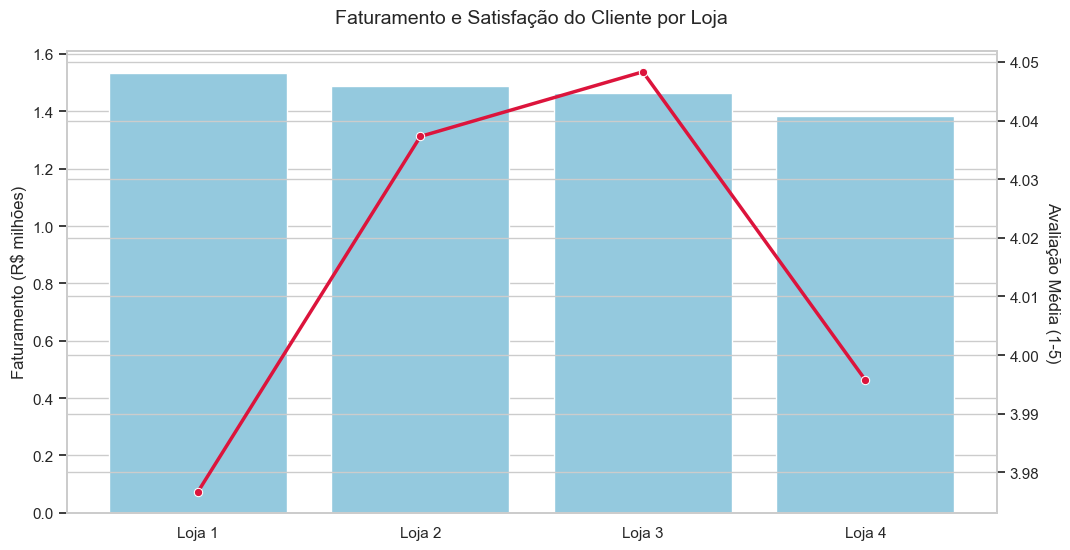

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Combinando dados
dados_combinados = faturamento_total.merge(avaliacao_media, on='Loja')
dados_combinados['Faturamento (mi)'] = dados_combinados['Faturamento'] / 1e6

# Gráfico duplo
ax1 = sns.barplot(x='Loja', y='Faturamento (mi)', data=dados_combinados, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(x='Loja', y='Média de Avaliação', data=dados_combinados, 
             marker='o', color='crimson', ax=ax2, linewidth=2.5)

# Customização
ax1.set_title('Faturamento e Satisfação do Cliente por Loja', fontsize=14, pad=20)
ax1.set_ylabel('Faturamento (R$ milhões)')
ax2.set_ylabel('Avaliação Média (1-5)', rotation=270, labelpad=15)
ax1.set_xlabel('')
plt.show()

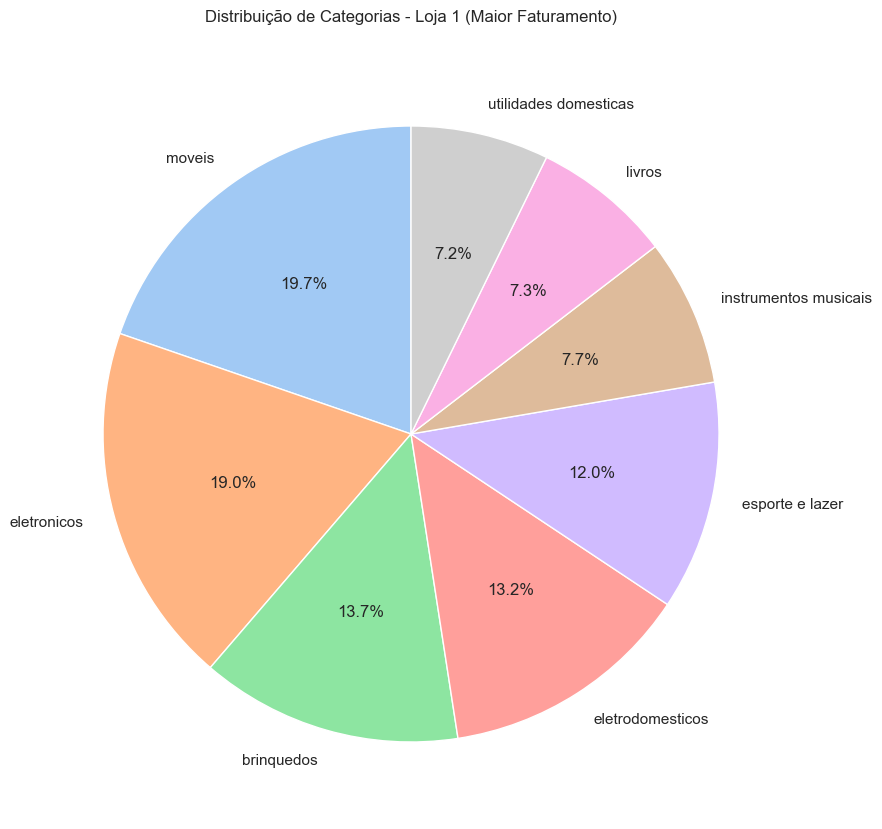

In [21]:
# Preparando dados
categorias_loja1 = loja1['Categoria do Produto'].value_counts()

# Gráfico
plt.figure(figsize=(10, 10))
plt.pie(categorias_loja1, labels=categorias_loja1.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title('Distribuição de Categorias - Loja 1 (Maior Faturamento)', pad=20)
plt.show()

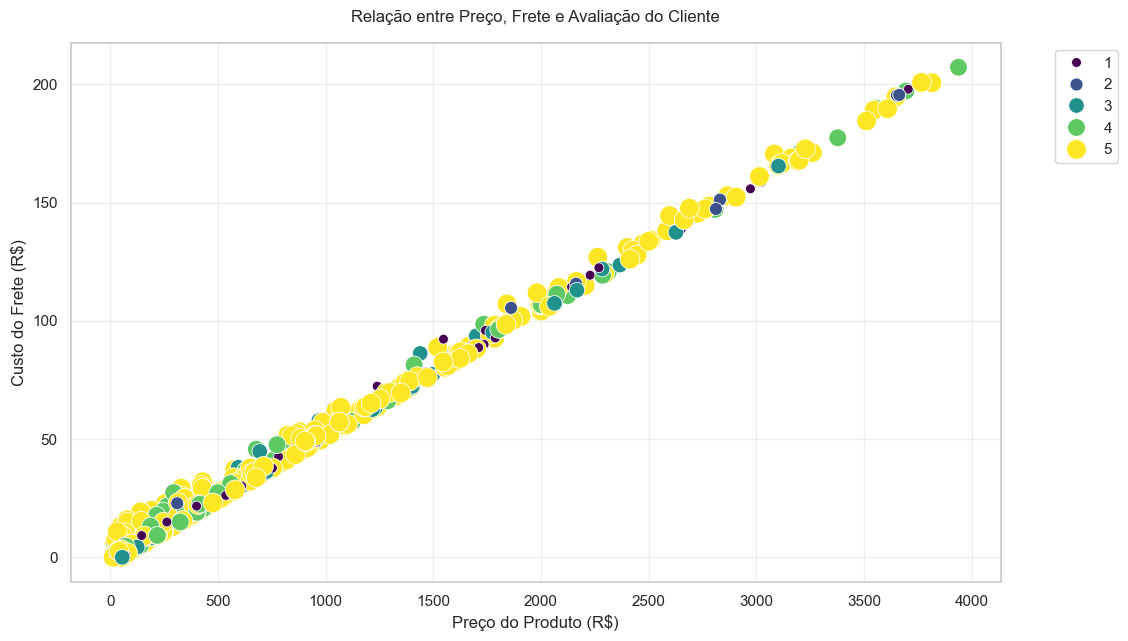

In [22]:
plt.figure(figsize=(12, 7))

# Amostragem para melhor visualização
amostra = pd.concat([loja1, loja2, loja3, loja4]).sample(1000)

scatter = sns.scatterplot(x='Preço', y='Frete', hue='Avaliação da compra', 
                          size='Avaliação da compra', sizes=(50, 200),
                          palette='viridis', data=amostra)

plt.title('Relação entre Preço, Frete e Avaliação do Cliente', pad=15)
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Custo do Frete (R$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Análise de Desempenho Geográfico das Vendas

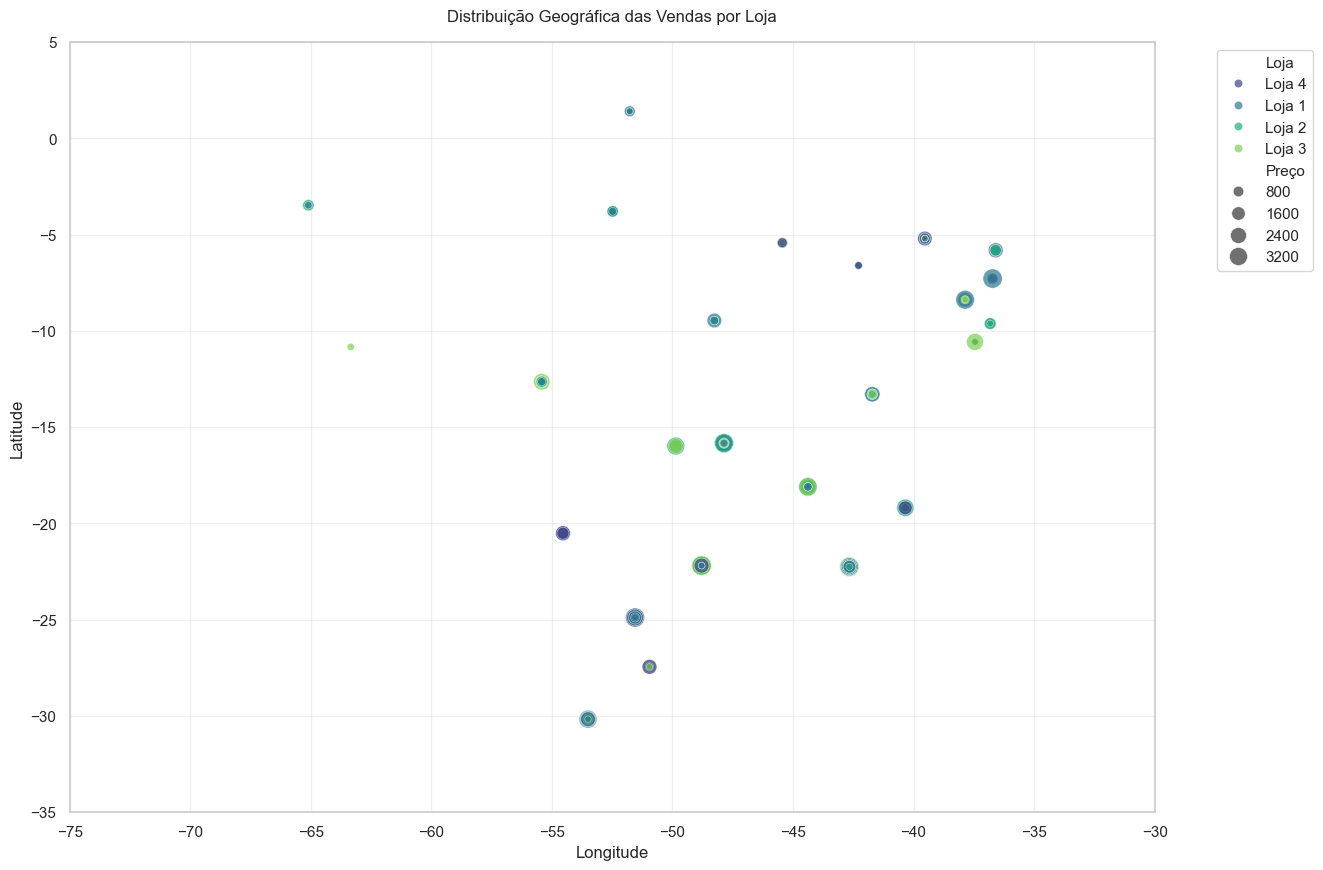

In [31]:
plt.figure(figsize=(14, 10))

# Combinando todos os dados
dados_completos = pd.concat([
    loja1.assign(Loja='Loja 1'),
    loja2.assign(Loja='Loja 2'),
    loja3.assign(Loja='Loja 3'),
    loja4.assign(Loja='Loja 4')
])

# Amostragem para melhor visualização
amostra_geo = dados_completos.sample(1000) if len(dados_completos) > 1000 else dados_completos

# Criando o scatter plot geográfico
scatter = sns.scatterplot(
    x='lon', y='lat', hue='Loja', 
    size='Preço', sizes=(20, 200),
    palette='viridis', alpha=0.7,
    data=amostra_geo
)

plt.title('Distribuição Geográfica das Vendas por Loja', pad=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Adicionando bordas do Brasil
plt.xlim(-75, -30)
plt.ylim(-35, 5)
plt.show()

2. Mapas de Calor por Loja

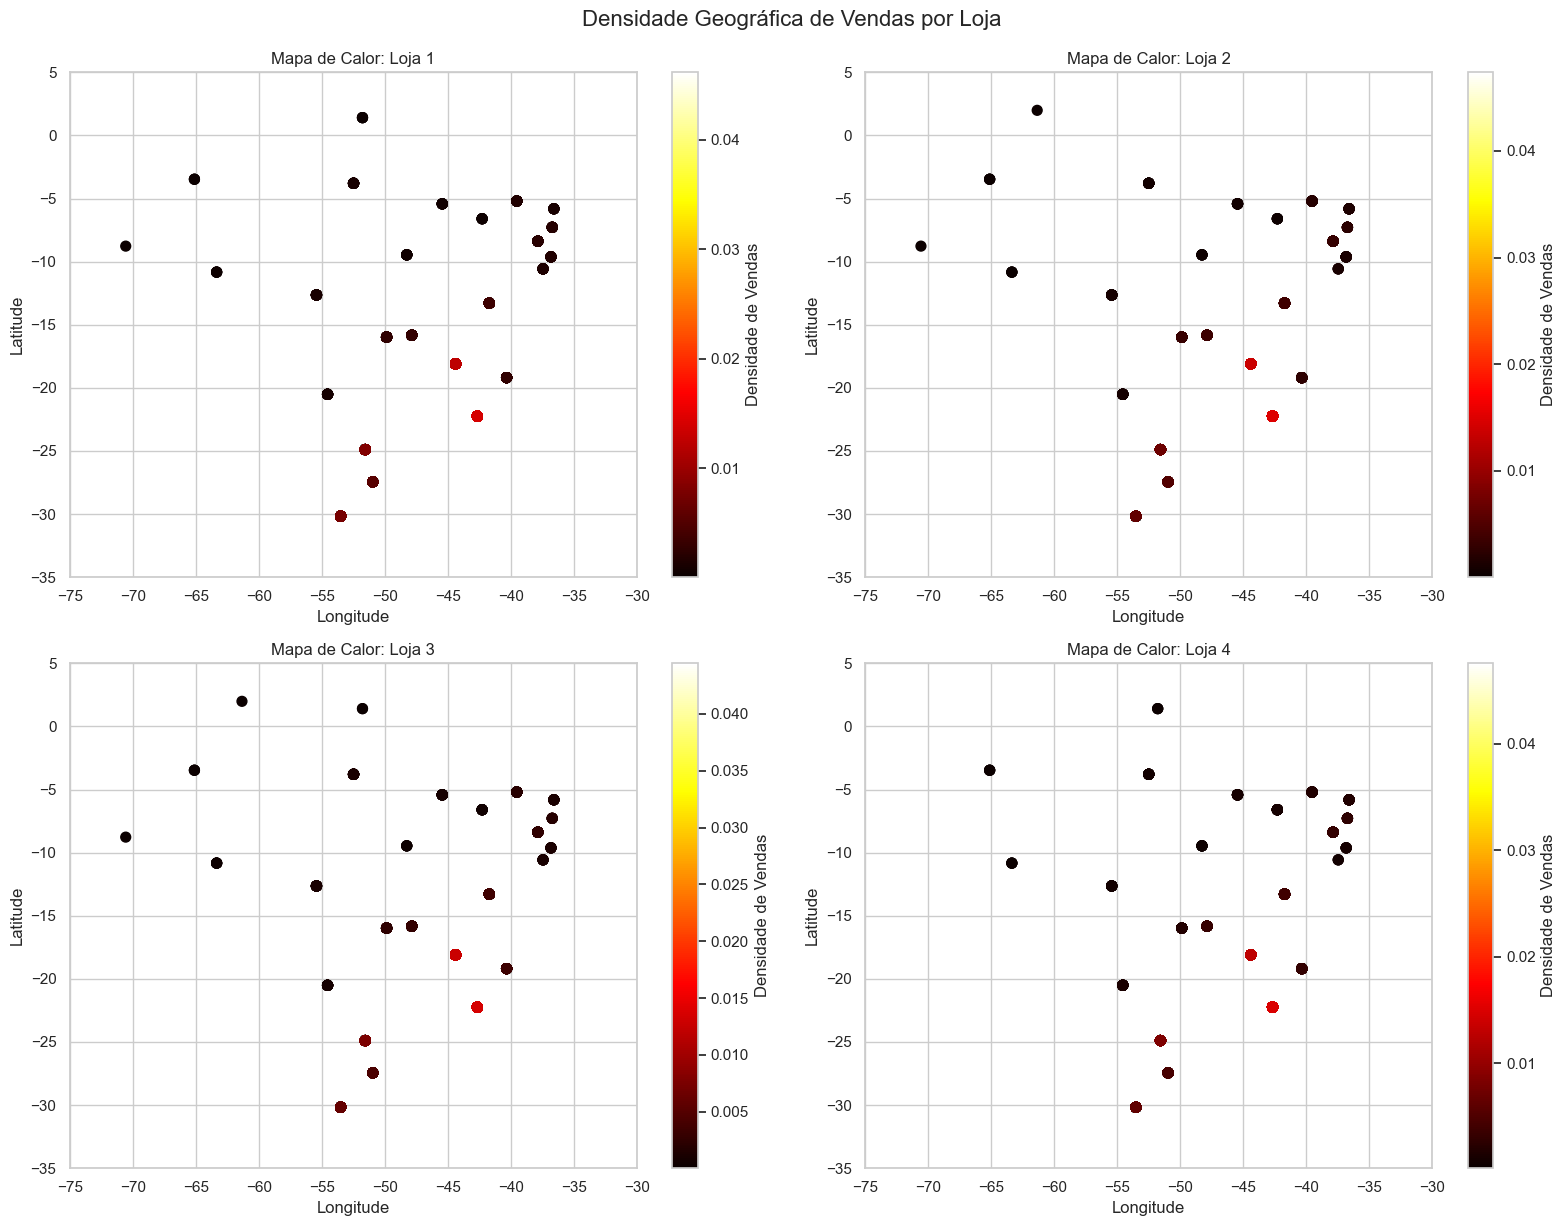

In [32]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(16, 12))
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i, loja in enumerate(lojas, 1):
    plt.subplot(2, 2, i)
    dados_loja = dados_completos[dados_completos['Loja'] == loja]
    
    # Calculando a densidade
    x = dados_loja['lon']
    y = dados_loja['lat']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    # Plotando
    plt.scatter(x, y, c=z, s=50, cmap='hot')
    plt.title(f'Mapa de Calor: {loja}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-75, -30)
    plt.ylim(-35, 5)
    plt.colorbar(label='Densidade de Vendas')

plt.tight_layout()
plt.suptitle('Densidade Geográfica de Vendas por Loja', y=1.02, fontsize=16)
plt.show()

3. Análise de Desempenho por Região

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_8752\2327658040.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desempenho_regional = dados_completos.groupby(['Loja', 'Região']).agg({


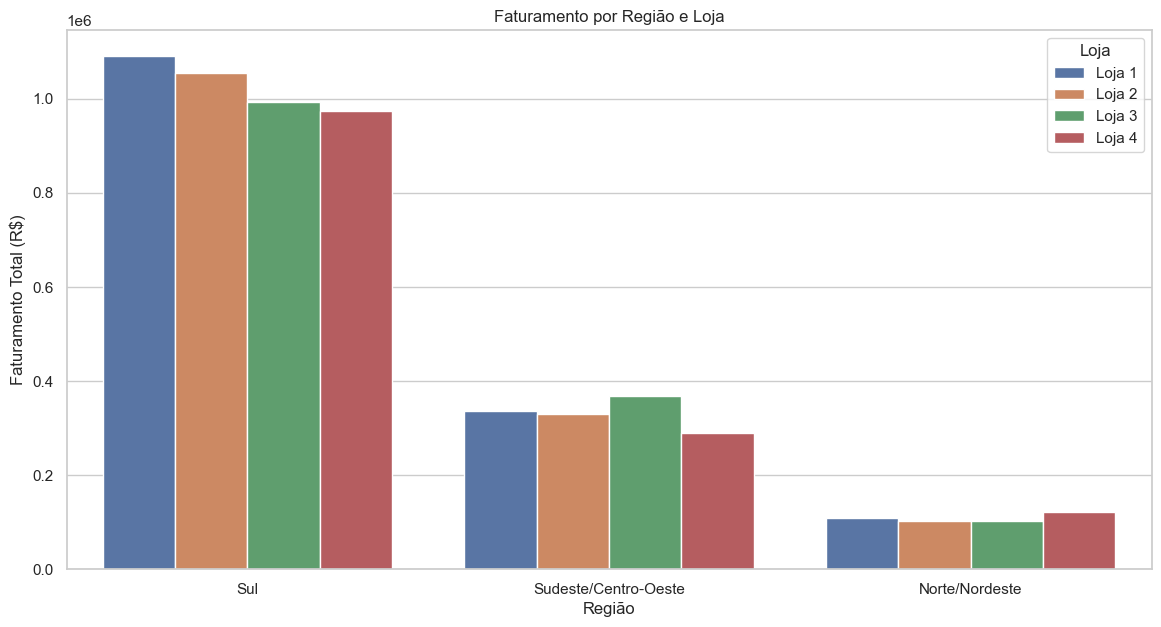

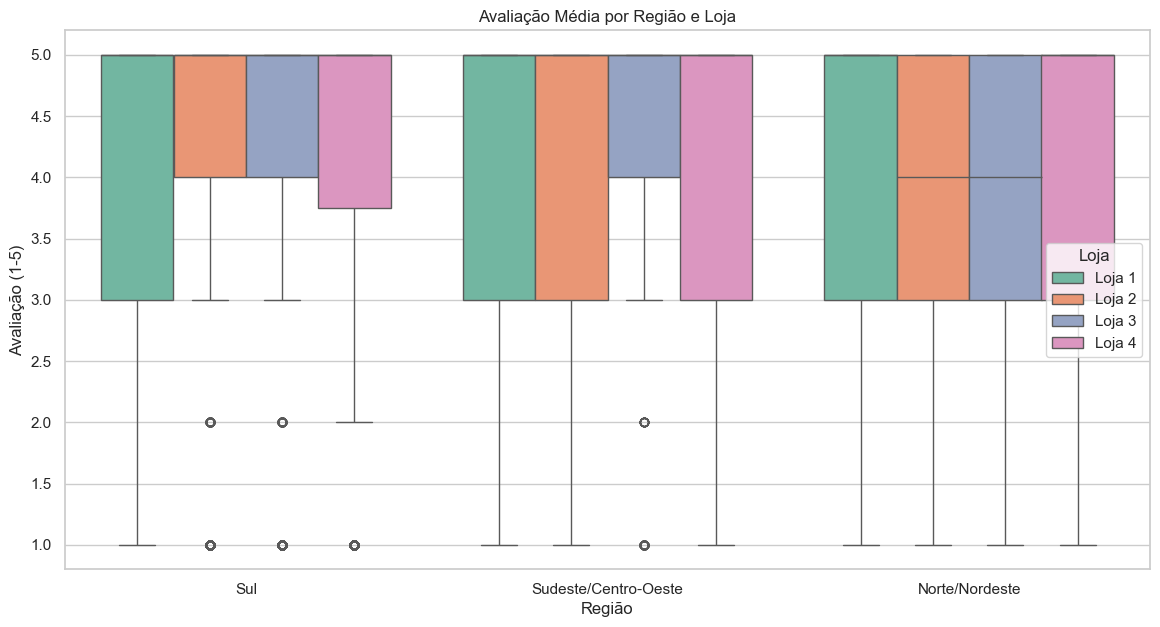

In [25]:
# Agrupando por região (poderia ser por estado usando geolocalização)
dados_completos['Região'] = pd.cut(dados_completos['lat'], 
                                  bins=[-35, -20, -10, 5],
                                  labels=['Sul', 'Sudeste/Centro-Oeste', 'Norte/Nordeste'])

desempenho_regional = dados_completos.groupby(['Loja', 'Região']).agg({
    'Preço': 'sum',
    'Avaliação da compra': 'mean',
    'Frete': 'mean'
}).reset_index()

# Gráfico de Barras para Faturamento Regional
plt.figure(figsize=(14, 7))
sns.barplot(x='Região', y='Preço', hue='Loja', data=desempenho_regional)
plt.title('Faturamento por Região e Loja')
plt.ylabel('Faturamento Total (R$)')
plt.xlabel('Região')
plt.legend(title='Loja')
plt.show()

# Gráfico de Avaliação Média Regional
plt.figure(figsize=(14, 7))
sns.boxplot(x='Região', y='Avaliação da compra', hue='Loja', 
            data=dados_completos, palette='Set2')
plt.title('Avaliação Média por Região e Loja')
plt.ylabel('Avaliação (1-5)')
plt.xlabel('Região')
plt.legend(title='Loja')
plt.show()